## Making a decision tree for Assignment 2

1.	What is the proportion of patients who are classified as COVID-19 positive? Would you require a sampling technique on this data?
2.	[Did you have to fix any data quality problems? Detail them.](#datatype)
3.	[What variables did you include in the analysis? Justify the choice of input selection (input/target).](#target)

1.	[Build a decision tree using the default setting. Answer the following:](#buildtr)
 *	[What is the classification accuracy of training and test datasets?](#class_acc)
 *	[What is the size of the tree (number of nodes and rules)?](#node_count)
 *	[Which variable is used for the first split?](#fristsplit)
 *	[What are the five important variables in building the tree?](#fivefeature)
 *	What parameters have been used in building the tree? Detail them. 
2.	[Build another decision tree tuned with GridSearchCV. Answer the following:](#GridSearchCV)
 *	[What is the classification accuracy of training and test datasets? ](#best")
 *	[What is the size of the tree (i.e. number of nodes and rules)? Is the size different from the tree in the previous step? Why?](#node_count_gs)
 *	[Which variable is used for the first split?
 *	What are the five important variables in building the tree?](#feature2)
 *	Report if you see any evidence of model overfitting.
 *	What are the parameters used? Detail them.
3.	What is the difference you see between these two decision tree models (refer to the size of the trees—number of nodes and rules)? How do they compare performance-wise? [Produce the ROC curve for both DTs. Explain why those changes may have happened.](#roc)
4.	From the better model, can you identify which patients could potentially be 'COVID-19 Positive'? Can you provide general characteristics of those patients?




In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle                  
import sklearn.preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
brazil_df = pd.read_excel("dataset.xlsx")


## Taking Regular blood Test and Influenza rapid Test from brazil set

In [13]:
brazil_enc=brazil_df[["SARS-Cov-2 exam result", "Patient age quantile","Proteina C reativa mg/dL","Neutrophils","Mean platelet volume ","Monocytes","Red blood cell distribution width (RDW)","Red blood Cells","Platelets","Eosinophils","Basophils","Leukocytes","Mean corpuscular hemoglobin (MCH)","Mean corpuscular volume (MCV)","Mean corpuscular hemoglobin concentration (MCHC)","Lymphocytes","Hemoglobin","Hematocrit",'Influenza B', 'Influenza A']]
brazil_enc.head()

,SARS-Cov-2 exam result,Patient age quantile,Proteina C reativa mg/dL,Neutrophils,Mean platelet volume,Monocytes,Red blood cell distribution width (RDW),Red blood Cells,Platelets,Eosinophils,Basophils,Leukocytes,Mean corpuscular hemoglobin (MCH),Mean corpuscular volume (MCV),Mean corpuscular hemoglobin concentration (MCHC),Lymphocytes,Hemoglobin,Hematocrit,Influenza B,Influenza A
0,negative,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,negative,17,-0.147895,-0.619086,0.010677,0.357547,-0.625073,0.102004,-0.517413,1.482158,-0.223767,-0.09461,-0.292269,0.166192,-0.95079,0.318366,-0.02234,0.236515,not_detected,not_detected
2,negative,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,negative,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,negative,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected


In [14]:
#Missing Value in Percentage
brazil_enc.isna().mean().round(4)*100

SARS-Cov-2 exam result                               0.00
Patient age quantile                                 0.00
Proteina C reativa mg/dL                            91.03
Neutrophils                                         90.91
Mean platelet volume                                89.39
Monocytes                                           89.35
Red blood cell distribution width (RDW)             89.33
Red blood Cells                                     89.33
Platelets                                           89.33
Eosinophils                                         89.33
Basophils                                           89.33
Leukocytes                                          89.33
Mean corpuscular hemoglobin (MCH)                   89.33
Mean corpuscular volume (MCV)                       89.33
Mean corpuscular hemoglobin concentration (MCHC)    89.33
Lymphocytes                                         89.33
Hemoglobin                                          89.32
Hematocrit    

Dropping NaN value and replacing with median

In [15]:
brazil_enc= brazil_enc.dropna(axis=0, thresh=9)
brazil_enc = brazil_enc.fillna(brazil_enc.median()).round(2)

In [16]:
brazil_enc.describe()

,Patient age quantile,Proteina C reativa mg/dL,Neutrophils,Mean platelet volume,Monocytes,Red blood cell distribution width (RDW),Red blood Cells,Platelets,Eosinophils,Basophils,Leukocytes,Mean corpuscular hemoglobin (MCH),Mean corpuscular volume (MCV),Mean corpuscular hemoglobin concentration (MCHC),Lymphocytes,Hemoglobin,Hematocrit
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000
mean,11.156146,-0.061777,-0.007475,-0.000233,-0.000266,-0.000532,-0.000282,-0.000033,-0.000050,0.000581,-0.000249,-0.000133,0.001827,0.000033,-0.000017,-0.000880,-0.001213
std,5.710620,0.928387,0.923930,0.998067,1.000159,1.000957,1.000912,1.000786,1.001033,1.000388,1.000683,1.000724,1.002343,1.000534,1.000929,1.001365,1.000940
min,0.000000,-0.540000,-3.340000,-2.460000,-2.160000,-1.600000,-3.970000,-2.550000,-0.840000,-1.140000,-2.020000,-5.940000,-5.100000,-5.430000,-1.870000,-4.350000,-4.500000
25%,7.000000,-0.500000,-0.577500,-0.660000,-0.610000,-0.630000,-0.570000,-0.610000,-0.670000,-0.530000,-0.640000,-0.500000,-0.510000,-0.550000,-0.730000,-0.590000,-0.520000
50%,12.000000,-0.390000,-0.050000,-0.100000,-0.120000,-0.180000,0.010000,-0.125000,-0.330000,-0.220000,-0.210000,0.130000,0.070000,-0.050000,-0.010000,0.040000,0.050000
75%,16.000000,-0.122500,0.510000,0.680000,0.490000,0.350000,0.670000,0.532500,0.340000,0.390000,0.457500,0.600000,0.630000,0.640000,0.597500,0.730000,0.720000
max,19.000000,8.030000,2.540000,3.710000,4.530000,6.980000,3.650000,9.530000,8.350000,11.080000,4.520000,4.100000,3.410000,3.330000,3.760000,2.670000,2.660000


No Missing value. We will proceed with datatype correction

In [17]:
#Missing Value in Percentage
brazil_enc.isna().mean().round(4)*100

SARS-Cov-2 exam result                               0.0
Patient age quantile                                 0.0
Proteina C reativa mg/dL                             0.0
Neutrophils                                          0.0
Mean platelet volume                                 0.0
Monocytes                                            0.0
Red blood cell distribution width (RDW)              0.0
Red blood Cells                                      0.0
Platelets                                            0.0
Eosinophils                                          0.0
Basophils                                            0.0
Leukocytes                                           0.0
Mean corpuscular hemoglobin (MCH)                    0.0
Mean corpuscular volume (MCV)                        0.0
Mean corpuscular hemoglobin concentration (MCHC)     0.0
Lymphocytes                                          0.0
Hemoglobin                                           0.0
Hematocrit                     

<a id="datatype"></a>
**SARS-Cov-2 exam result, Influenza A, Influenza B** are simple yes/no cases. we will be encode them to binary for Decision Tree

In [18]:
print(brazil_enc["Influenza A"].value_counts())
print(brazil_enc["Influenza B"].value_counts())
print(brazil_enc['SARS-Cov-2 exam result'].value_counts())

not_detected    362
detected          4
Name: Influenza A, dtype: int64
not_detected    341
detected         25
Name: Influenza B, dtype: int64
negative    519
positive     83
Name: SARS-Cov-2 exam result, dtype: int64


In [19]:
#Mapping positive case and negative case to binary
covid_exam_map = {'negative':0, 'positive': 1}
brazil_enc['SARS-Cov-2 exam result'] = brazil_enc['SARS-Cov-2 exam result'].map(covid_exam_map)
#Mapping detected case and not_detectede case to binary for Influenza B
inf_exam_map = {'not_detected':0, 'detected': 1}
brazil_enc['Influenza B'] = brazil_enc['Influenza B'].map(inf_exam_map)
#Mapping detected case and not_detectede case to binary for Influenza A
brazil_enc['Influenza A'] = brazil_enc['Influenza A'].map(inf_exam_map)


In [20]:
print(brazil_enc["Influenza A"].value_counts())
print(brazil_enc["Influenza B"].value_counts())
print(brazil_enc['SARS-Cov-2 exam result'].value_counts())

0.0    362
1.0      4
Name: Influenza A, dtype: int64
0.0    341
1.0     25
Name: Influenza B, dtype: int64
0    519
1     83
Name: SARS-Cov-2 exam result, dtype: int64


In [21]:
#Missing Value in Percentage
brazil_enc.isna().mean().round(4)*100

SARS-Cov-2 exam result                               0.0
Patient age quantile                                 0.0
Proteina C reativa mg/dL                             0.0
Neutrophils                                          0.0
Mean platelet volume                                 0.0
Monocytes                                            0.0
Red blood cell distribution width (RDW)              0.0
Red blood Cells                                      0.0
Platelets                                            0.0
Eosinophils                                          0.0
Basophils                                            0.0
Leukocytes                                           0.0
Mean corpuscular hemoglobin (MCH)                    0.0
Mean corpuscular volume (MCV)                        0.0
Mean corpuscular hemoglobin concentration (MCHC)     0.0
Lymphocytes                                          0.0
Hemoglobin                                           0.0
Hematocrit                     

Influenza A Influenza B still have some NaN. Using Dummies to get rid of NaN for test fiting 

In [22]:
brazil_enc = pd.get_dummies(brazil_enc, columns=["Influenza A", "Influenza B"], dummy_na=True)

In [23]:
#Missing Value in Percentage
brazil_enc.isna().mean().round(4)*100

SARS-Cov-2 exam result                              0.0
Patient age quantile                                0.0
Proteina C reativa mg/dL                            0.0
Neutrophils                                         0.0
Mean platelet volume                                0.0
Monocytes                                           0.0
Red blood cell distribution width (RDW)             0.0
Red blood Cells                                     0.0
Platelets                                           0.0
Eosinophils                                         0.0
Basophils                                           0.0
Leukocytes                                          0.0
Mean corpuscular hemoglobin (MCH)                   0.0
Mean corpuscular volume (MCV)                       0.0
Mean corpuscular hemoglobin concentration (MCHC)    0.0
Lymphocytes                                         0.0
Hemoglobin                                          0.0
Hematocrit                                      

In [27]:
brazil_enc["SARS-Cov-2 exam result"].value_counts()

0    519
1     83
Name: SARS-Cov-2 exam result, dtype: int64

<a id="buildtr"></a>
## **Build a decision tree using the default setting.**

In [28]:
from sklearn.model_selection import train_test_split

y = brazil_enc['SARS-Cov-2 exam result'].copy()
X =  brazil_enc.drop(['SARS-Cov-2 exam result'], axis=1).copy()
#X_mat = pd.get_dummies(X)

#70% training and 30% testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=10)

#### Which Decision Tree algorithm to use? [DECISION TREES used in SciKit Learn](https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart)

H(X_m) = \sum_k p_{mk} (1 - p_{mk})

In [48]:
#build your Decision Tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix

rs = 10
# simple decision tree training
model = DecisionTreeClassifier(random_state=rs)
model.fit(X_train, y_train)

# Replicating the output in tutorials.  We'd like to see default params. 
print(model)
print(model.get_params())

print("\nTrain accuracy:", model.score(X_train, y_train))

print("Test accuracy:", model.score(X_test, y_test))

DecisionTreeClassifier(random_state=10)
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 10, 'splitter': 'best'}

Train accuracy: 1.0
Test accuracy: 0.850828729281768


### We should focus on the following hyperparameters
1. **`Criterion`**: A method to evaluate the quality of a split. This model uses **gini method**.
2. **`Max depth`**: The maximum depth of the tree. Deeper models are more complex and have more nodes. This model has no depth limitation, which means it can fit the data really well (a bit too well sometimes - resulting in **overfitting**).
3. **`Min samples leaf`**: The minimum number of samples required to be at a leaf node, allowing us to limit the minimum size of a leaf node. This model has min samples leaf of 1, almost no limitation on a node leaf.

#### The model has overfit in the training stage, and we have a large disparity in terms of test accuracy

* Lets look at classification accuracy of training and test datasets along with model

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       156
           1       0.45      0.36      0.40        25

    accuracy                           0.85       181
   macro avg       0.68      0.64      0.66       181
weighted avg       0.84      0.85      0.84       181

Model accuracy:  0.8508


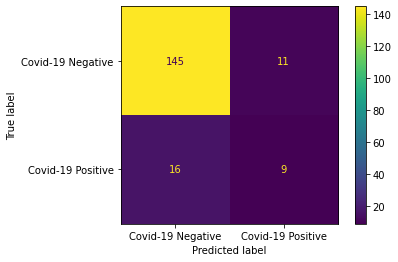

In [49]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model accuracy: ",accuracy_score(y_test, y_pred).round(4))

# Confusion matrix

plot_confusion_matrix(model,X_test,y_test,
                      display_labels=["Covid-19 Negative","Covid-19 Positive"])

* Number of node can be found withing model under **`tree_.node_count`**
* We can visualize the Tree Depth with **`get_depth`** method. 
* Max number of leaf node can be found using **`get_n_leaves()`** function.
<a id="node_count"></a>

In [50]:
n_nodes = model.tree_.node_count
print("No of Nodes:  ",n_nodes)
print("Max Number of leaf Node",model.get_n_leaves())
print("Depth of Tree is ",model.get_depth())

No of Nodes:   75
Max Number of leaf Node 38
Depth of Tree is  11


<a id="fivefeature"></a>

## Feature importance

* Impactful variables are stored as **feature importance** within the model, accessed by **`feature_importances_`** attrribute.
* In an `sklearn` decision tree, feature importance is stored within the model itself in form of **(feature_index, feature_importance_value)**. For easier interpretation, let's match this data with feature names from `X`, sort them in descending order of importance and print them out.

The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the **Gini importance**.

Warning: impurity-based feature importances can be misleading for high cardinality features (**many unique values**). See `sklearn.inspection.permutation_importance` as an alternative.

**Returns:**
* **`feature_importances_ndarray`** of shape `(n_features,)`
* Normalized total reduction of criteria by feature (Gini importance).

[Decision Tree Classifier docs] https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [46]:
importances = pd.DataFrame({'Feature':X_train.columns,
                            'Importance':np.round(model.feature_importances_, 4)})
importances = importances.sort_values('Importance',ascending=False)
importances.head()

,Feature,Importance
10,Leukocytes,0.2438
15,Hemoglobin,0.1392
7,Platelets,0.1328
8,Eosinophils,0.0927
1,Proteina C reativa mg/dL,0.0868


<a id="fristsplit"></a>
In feature list we see **Leukocytes	0.244** has highest importance value. Tree will use this as first split. 

## Visualisation of Tree with default setting 
File will be saved in tree folder. We will use this for reporting.

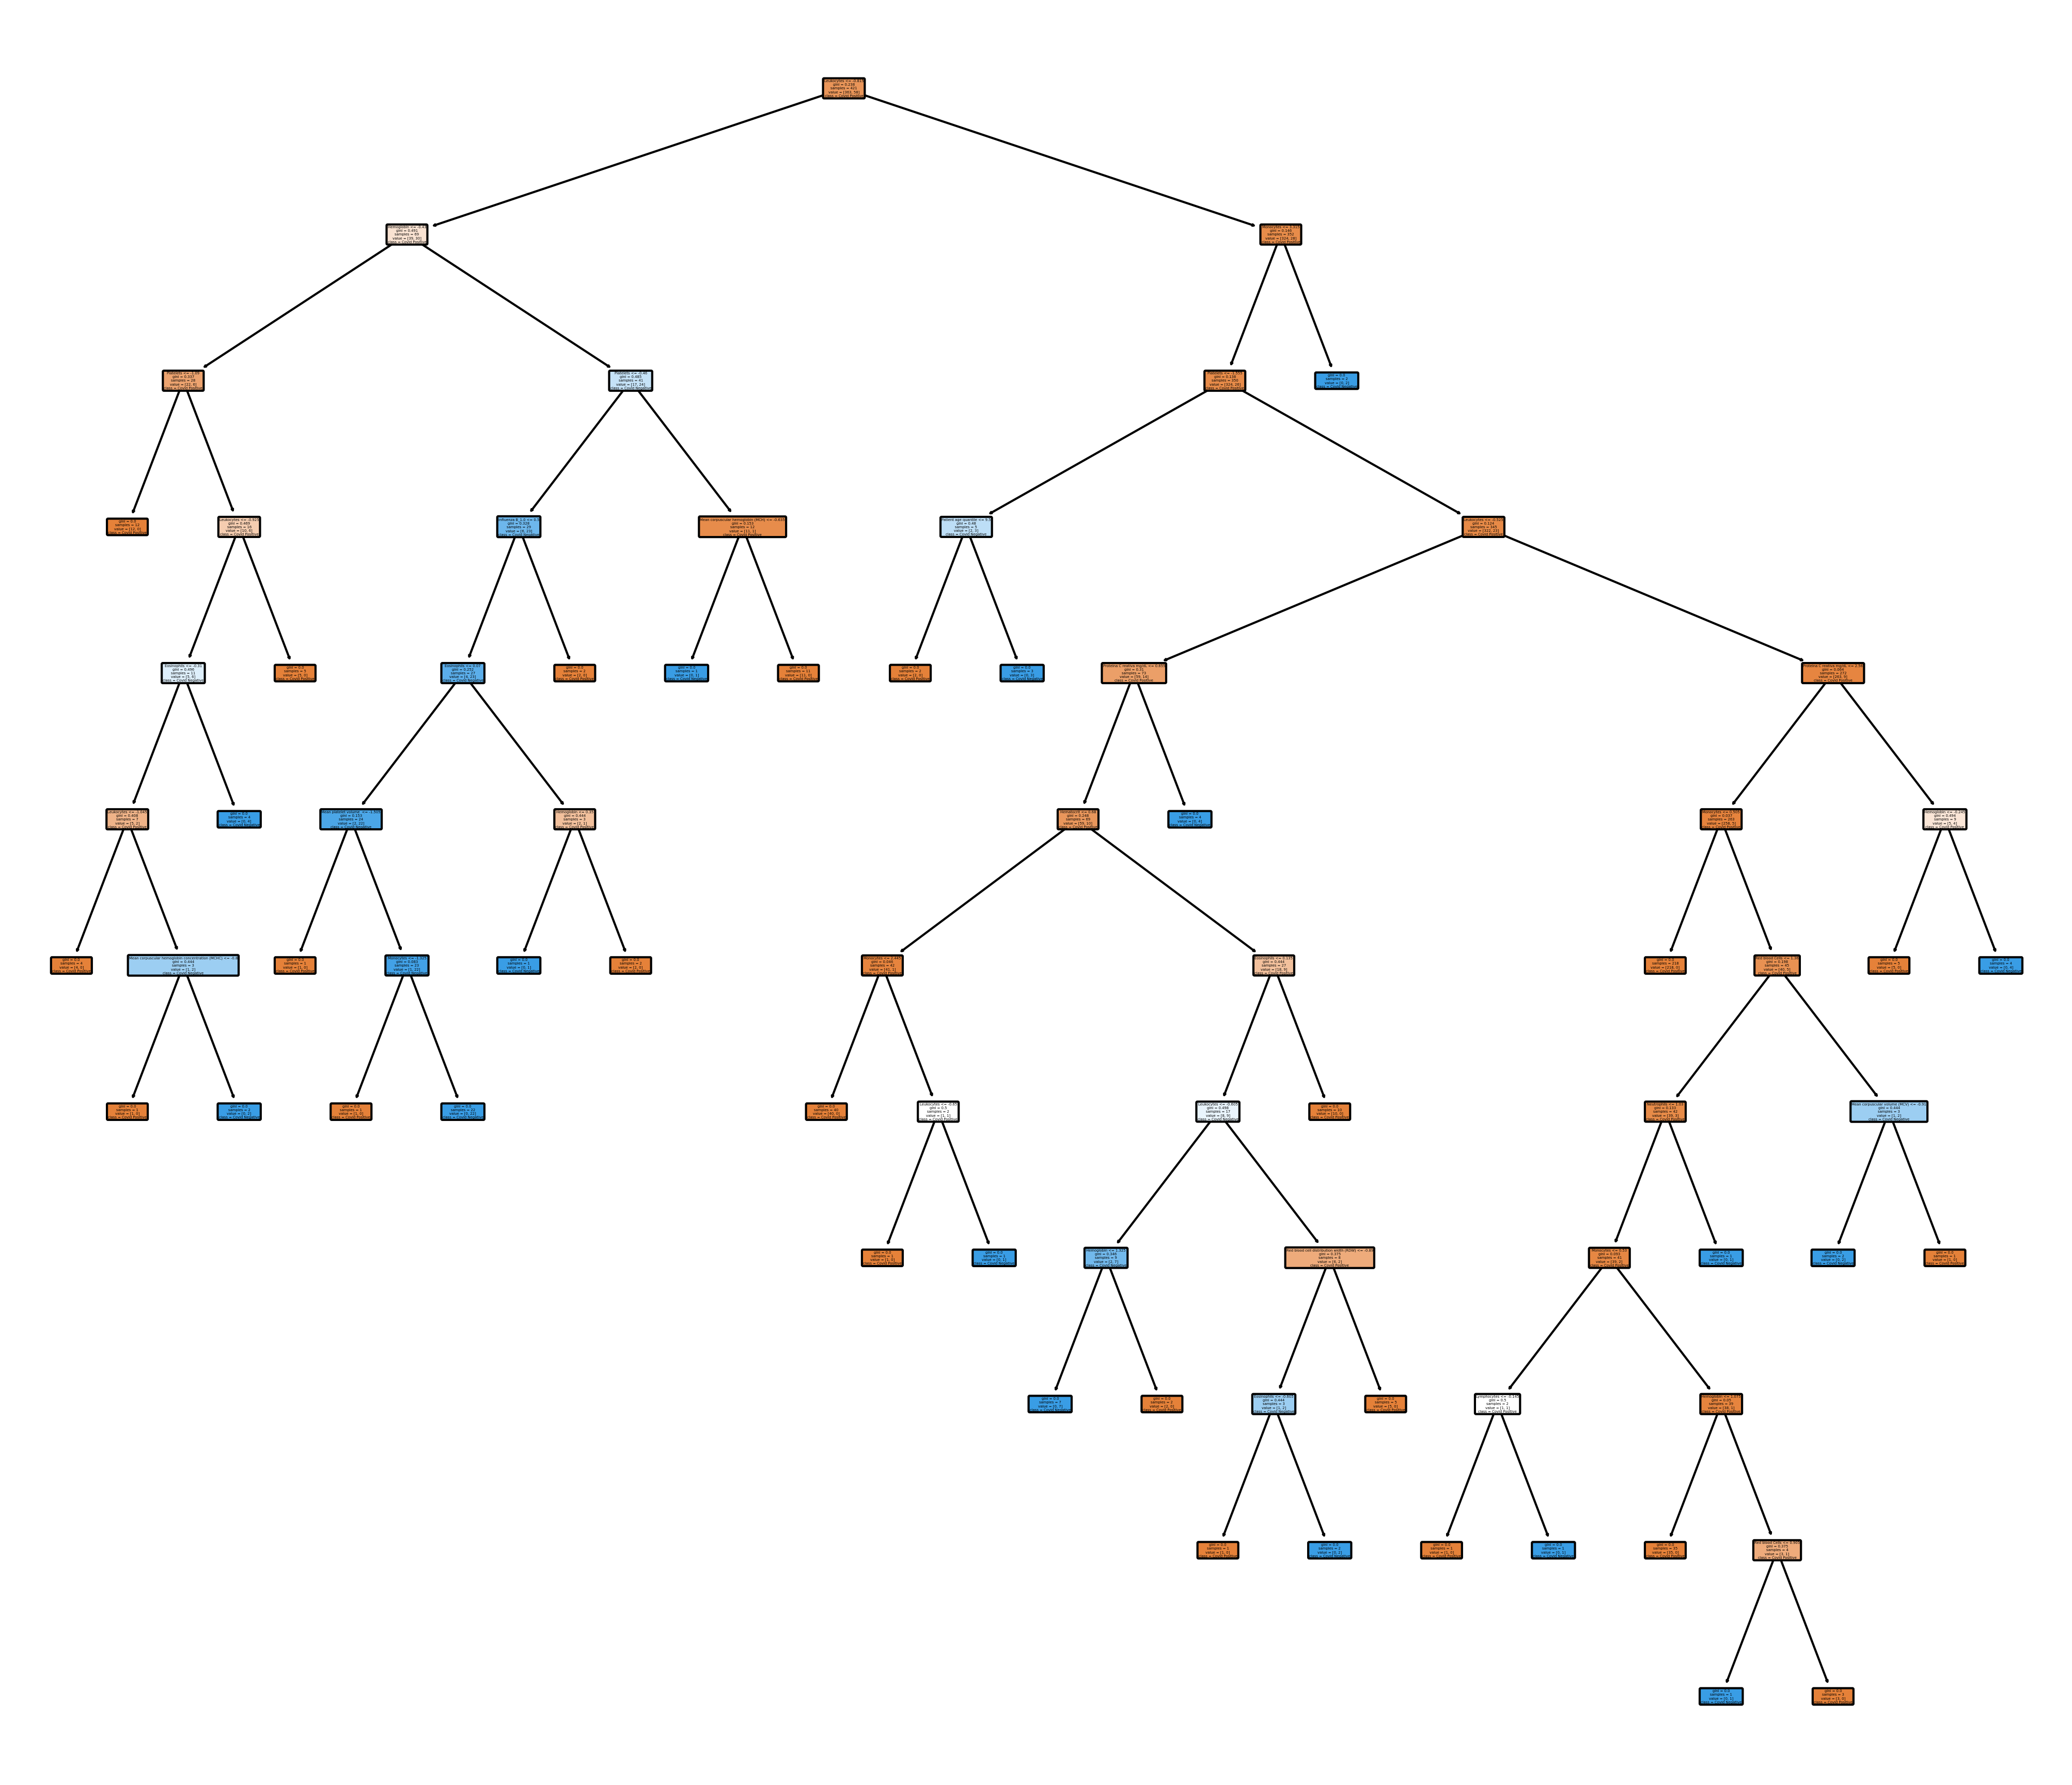

In [66]:
plt.figure(figsize=(17,15),dpi = 300)
tree.plot_tree(model,feature_names = X.columns,class_names=["Covid Positive","Covid Negative"],
               filled = True, rounded=True );
#save the default tree to file 
plt.savefig('tree/defaulttree.png')

# Decision tree tuned with GridSearchCV
<a id="GridSearchCV"></a>
One of the common task as data scientist is to find a model that is accurate, and claims to **fit the data** correctly. We have the option of tuning certain hyperparameters in the  GridsearchCV algorithm, which combines a Decision Tree, with GridSearch and k-fold Cross-Validation.
* Here we aim to test various values for the maximum tree depth, the number of samples required to be at each leaf node, as well as the criterion that is used to determine splits in the tree that minimize uncertainty.

Explanation:
* Criterion: Both Gini & Enropy will be used for this gridsearch
* **`Max_depth`**: We are using range from 1 to 15. Remember our default tree has 11. 
    * Anything above that will only make our new tree bigger than existing one
    * **`Max_depth`** is a method of **pre-pruning**
* **`Min_samples_leaf`**: This will allow us to limit size of leaf node..

> #### On hyperparameters vs parameters
> In machine learning/data mining community, there is a clear distinction between hyperparameters vs parameters, especially in the context of a model. **Hyperparameters** typically refer to settings of a model that is specified before training, such as maximal depth, splitting criterion and min samples leaf. On the other hand, **parameters** is characteristic of a model that is learned during training process. For decision tree, examples of parameters including number of leaf, splitting rule and feature importance.

In [60]:
# grid search CV
from sklearn.model_selection import GridSearchCV
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(1, 15),
          'min_samples_leaf': range(0, 25, 5)[1:]}

cv_1 = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs),
                    return_train_score=True, cv=10)
cv_1.fit(X_train, y_train)

print(cv_1)
print(cv_1.get_params())

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 15),
                         'min_samples_leaf': range(5, 25, 5)},
             return_train_score=True)
{'cv': 10, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__presort': 'deprecated', 'estimator__random_state': 10, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=10), 'iid': 'deprecated', 'n_jobs': None, 'param_grid': {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 15), 'min_samples_leaf': range(5, 25, 5)}

<a id="best"></a>
<a id="node_count_gs"></a>
Lets see optimium parameters for tree
We can find best score & estmator using **best_score_ and best_estimator_**

In [61]:
print("Accuracy Score:",cv_1.best_score_.round(4))
print("Best Estimator:",cv_1.best_params_)


Accuracy Score: 0.8742
Best Estimator: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 20}


### Classificaiton report & Confusion Matrix

Train accuracy of optimised Tree: 0.9002
Test accuracy optimised Tree: 0.8564
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       156
           1       0.48      0.40      0.43        25

    accuracy                           0.86       181
   macro avg       0.69      0.66      0.68       181
weighted avg       0.85      0.86      0.85       181



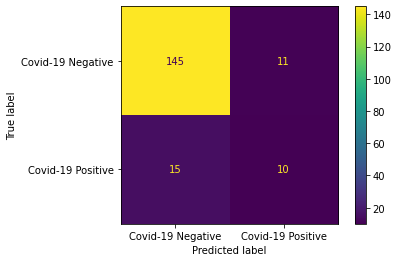

In [63]:
print("Train accuracy of optimised Tree:", cv_1.score(X_train, y_train).round(4))
print("Test accuracy optimised Tree:", cv_1.score(X_test, y_test).round(4))

y_pred_dt_cv = cv_1.predict(X_test)
print(classification_report(y_test, y_pred_dt_cv))

plot_confusion_matrix(cv_1.best_estimator_,X_test,y_test,
                      display_labels=["Covid-19 Negative","Covid-19 Positive"])

##### We have reduced the overfitting scenario, reducing training accuracy from 100%, whilst slightly improving our Test Accuracy to 0.8564.  
* Recall 0.4 for class=1 has improved also

####  The updated feature list is as follows:
* Noting Red Blood Cells and the Patient's Age Quantile gaining in importance

In [65]:
importancesgs = pd.DataFrame({'feature':X_train.columns,
                              'importance':np.round(cv_1.best_estimator_.feature_importances_,3)})
importancesgs = importancesgs.sort_values('importance',ascending=False)
importancesgs.head()

,feature,importance
10,Leukocytes,0.472
8,Eosinophils,0.233
7,Platelets,0.134
6,Red blood Cells,0.090
0,Patient age quantile,0.056


## Visualizing the Optimized Tree

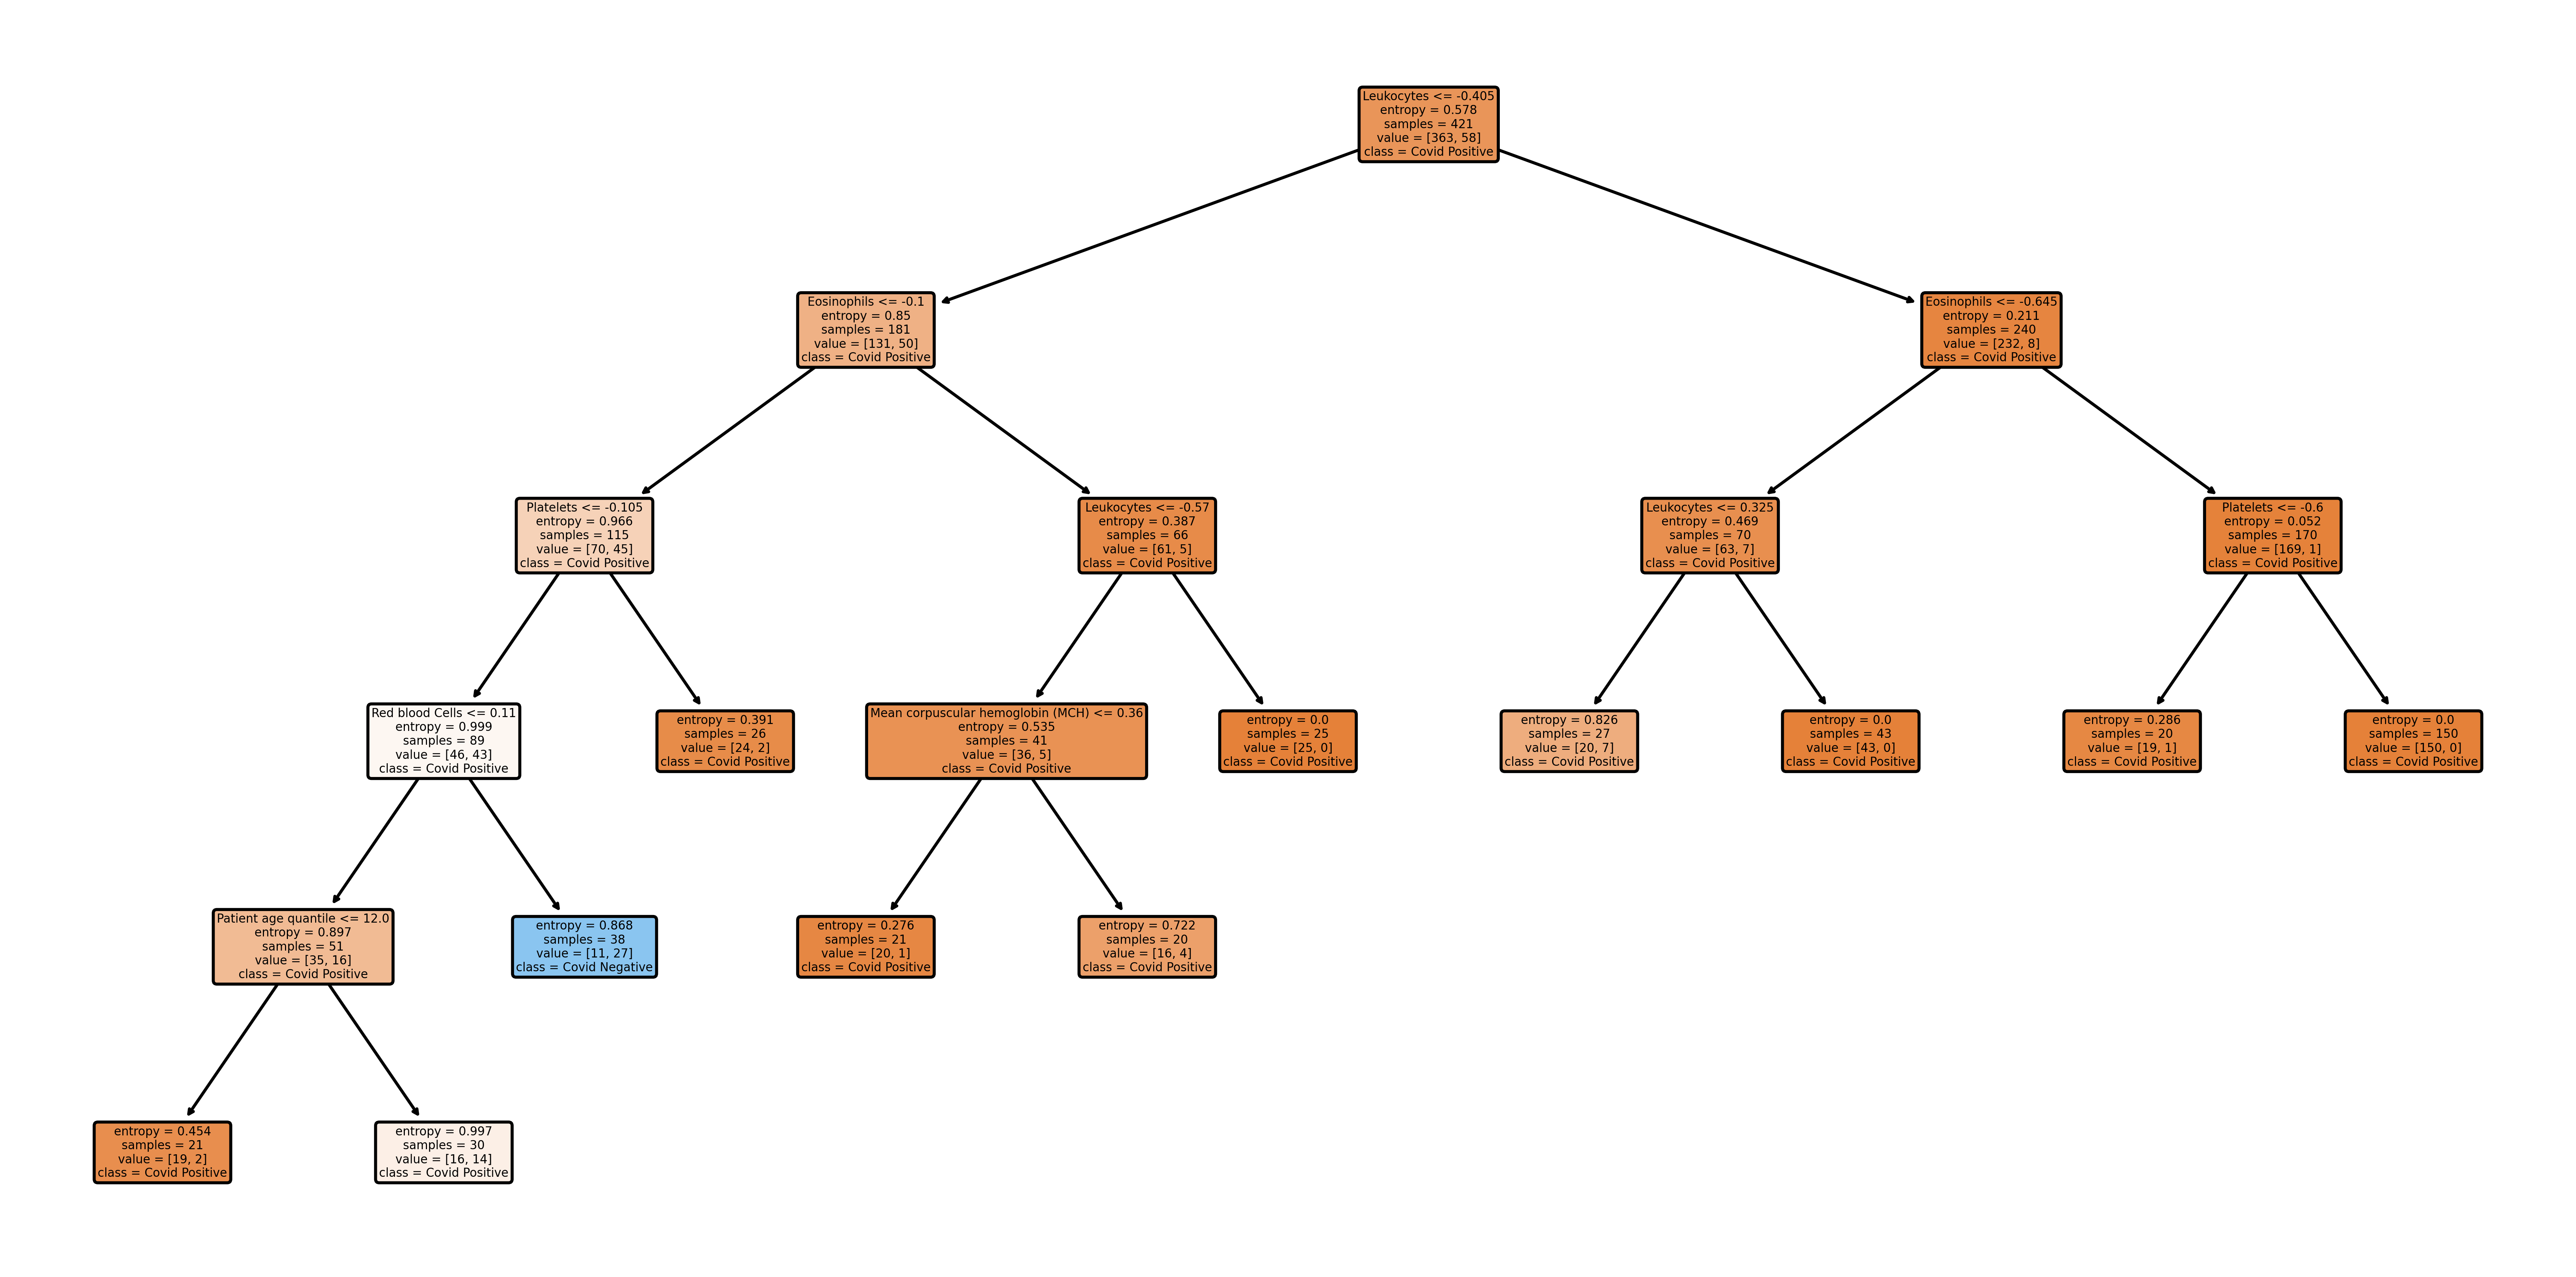

In [81]:
plt.figure(figsize=(15,7.5),dpi = 600)
tree.plot_tree(cv_1.best_estimator_, feature_names = X.columns,
               class_names=["Covid Positive","Covid Negative"],
               filled = True, rounded=True);
#save the default tree to file 
plt.savefig('tree/optitree.png')

In [67]:
result_set = cv_1.cv_results_
print(result_set)

{'mean_fit_time': array([0.01047883, 0.01236184, 0.01276803, 0.01083827, 0.01295137,
       0.01428149, 0.01336553, 0.01347992, 0.01804698, 0.0142096 ,
       0.0166702 , 0.01567025, 0.01446371, 0.01389832, 0.01453943,
       0.0149518 , 0.01722057, 0.01226137, 0.01287766, 0.01135175,
       0.01420808, 0.0152679 , 0.01218321, 0.01346521, 0.01488931,
       0.0133919 , 0.01652236, 0.01702878, 0.01500709, 0.01353314,
       0.01226728, 0.01347382, 0.01422703, 0.01235142, 0.01123919,
       0.01087143, 0.01453419, 0.01877666, 0.01423278, 0.01270578,
       0.01456003, 0.01464577, 0.0148293 , 0.01226277, 0.01516509,
       0.01543918, 0.01437042, 0.01520309, 0.01408935, 0.01287181,
       0.01145692, 0.01226938, 0.01208808, 0.01287456, 0.01165116,
       0.011569  , 0.01019623, 0.01129544, 0.00965557, 0.00950608,
       0.0116683 , 0.0103389 , 0.0107594 , 0.01050045, 0.01159916,
       0.01442053, 0.01275122, 0.01100638, 0.01333935, 0.01446166,
       0.01321306, 0.01205885, 0.01310654, 0

The `cv_results_` returns all the combination of hyperparameters (`'params'`) and their respective score. You should also notice there are 10 `split_test_score` and `split_train_score`. Let us first explore the train and test score of the first split `split0`.

Total number of models:  112


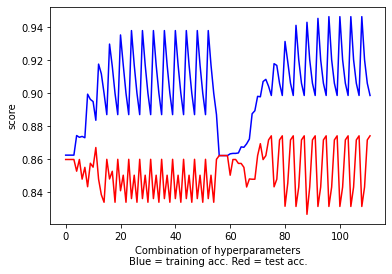

In [75]:
import matplotlib.pyplot as plt

train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))
# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Combination of hyperparameters\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.show()

There are a total of **`112`** combinations of hyperparameters (2 `criterion` x 14 `max_depth_options` x 4 `min_leaf_samples`) meaning that there are `112` models. 

Let us now focus only on the **`max_depth`** to understand the bias and variance for the fixed `criterion = entropy` and `max_sample_leaf = 15`.

#### Note: Change values in the `min_samples_leaf` AND `Gini / Entropy` below for 
* interesting edits on the chart

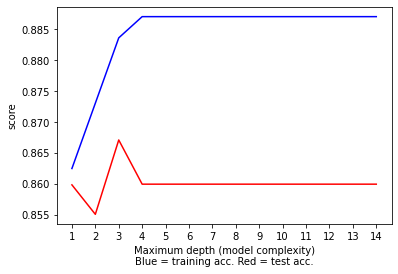

Best Estimator:
 DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=20,
                       random_state=10)


In [85]:
# This is a neater way of targeting variables

result_set['params']
dd = pd.DataFrame(result_set['params'])

index_ = list(dd.index[(dd['criterion']=='gini') & (dd['min_samples_leaf']==20)])
max_depth_train = []
max_depth_test = []
for i in range(0,len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.show()

print("Best Estimator:\n", cv_1.best_estimator_)

## Feature importance using Random Forest  (extension)

* Feature importance is another feature selection technique used to select features. 
* It gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

* Bagged decision trees models like Random Forest can be used to estimate the importance of features.


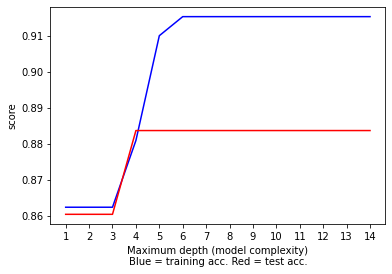

In [70]:
result_set['params']
dd = pd.DataFrame(result_set['params'])

index_ = list(dd.index[(dd['criterion']=='entropy') & (dd['min_samples_leaf']==10)])
max_depth_train = []
max_depth_test = []
for i in range(0,len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.show()

## We can see our Optimised tree is smaller than default one .

Comparision and finding the best performing model using ROC curve 

In [49]:
y_pred_dt = model.predict(X_test)
y_pred_dt_cv = cv_1.predict(X_test)

print("Accuracy score on test for default Tree:", accuracy_score(y_test, y_pred_dt))
print("Accuracy score on test for optimal Tree", accuracy_score(y_test, y_pred_dt_cv))

Accuracy score on test for default Tree: 0.850828729281768
Accuracy score on test for ptimal Tree 0.856353591160221


In [50]:
from sklearn.metrics import roc_auc_score

dt_cv_best = cv_1.best_estimator_
y_pred_proba_dt = model.predict_proba(X_test)
y_pred_proba_dt_cv = dt_cv_best.predict_proba(X_test)

roc_index_dt = roc_auc_score(y_test, y_pred_proba_dt[:, 1])
roc_index_dt_cv = roc_auc_score(y_test, y_pred_proba_dt_cv[:, 1])

print("ROC index on test for default Tree:", roc_index_dt)
print("ROC index on test for optimal Tree:", roc_index_dt_cv)

ROC index on test for default Tree: 0.6447435897435897
ROC index on test for optimal Tree: 0.8492307692307692


Calculating false positive rate, true positive rate and thresholds used for each model using roc_curve

In [51]:
from sklearn.metrics import roc_curve

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt[:,1])
fpr_dt_cv, tpr_dt_cv, thresholds_dt_cv = roc_curve(y_test, y_pred_proba_dt_cv[:,1])

<a id="roc"></a>
Ploting ROC curve

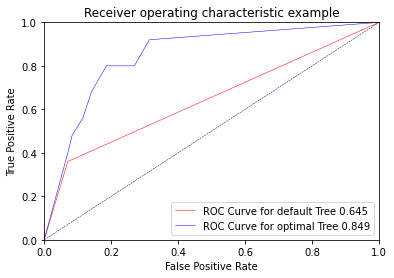

In [52]:
import matplotlib.pyplot as plt

plt.plot(fpr_dt, tpr_dt, label='ROC Curve for default Tree {:.3f}'.format(roc_index_dt), color='red', lw=0.5)
plt.plot(fpr_dt_cv, tpr_dt_cv, label='ROC Curve for optimal Tree {:.3f}'.format(roc_index_dt_cv), color='blue', lw=0.5)

# plt.plot(fpr[2], tpr[2], color='darkorange',
#          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Saving your output 

In [53]:
import pickle
dt_best = cv_1
with open('DT.pickle', 'wb') as f:
    pickle.dump([dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv], f)

In [54]:
pwd

'C:\\Users\\GK\\Documents\\GitHub\\covid19-diagnostics'